# Setting up Langtrace with Mistral

This Notebook shows the instructions for setting up OpenTelemetry based tracing for Mistral with Langtrace AI.

In [ ]:
%pip install mistralai langtrace-python-sdk

In [ ]:

import os

# Get your Langtrace api key from https://langtrace.ai
os.environ["LANGTRACE_API_KEY"] = "<YOUR_LANGTRACE_API_KEY>"

# Your Mistral key
os.environ["MISTRAL_API_KEY"] = "<YOUR_MISTRAL_API_KEY>"

In [ ]:
from mistralai import Mistral
from langtrace_python_sdk import with_langtrace_root_span, langtrace

# Initialize Langtrace
langtrace.init()

# Decorate with root span to group spans together (https://docs.langtrace.ai/tracing/group_traces)
@with_langtrace_root_span("chat_complete")
def chat_complete():
    model = "mistral-large-latest"
    client = Mistral()
    chat_response = client.chat.complete(
        model=model,
        messages=[
            {
                "role": "user",
                "content": "I need 10 cocktail recipes with tequila other than the classics like margarita, tequila"
            },
        ]
    )
    print(chat_response.choices[0].message.content)


if __name__ == "__main__":
    chat_complete()


**That's it! Now, head over to your project on Langtrace and view the traces.**

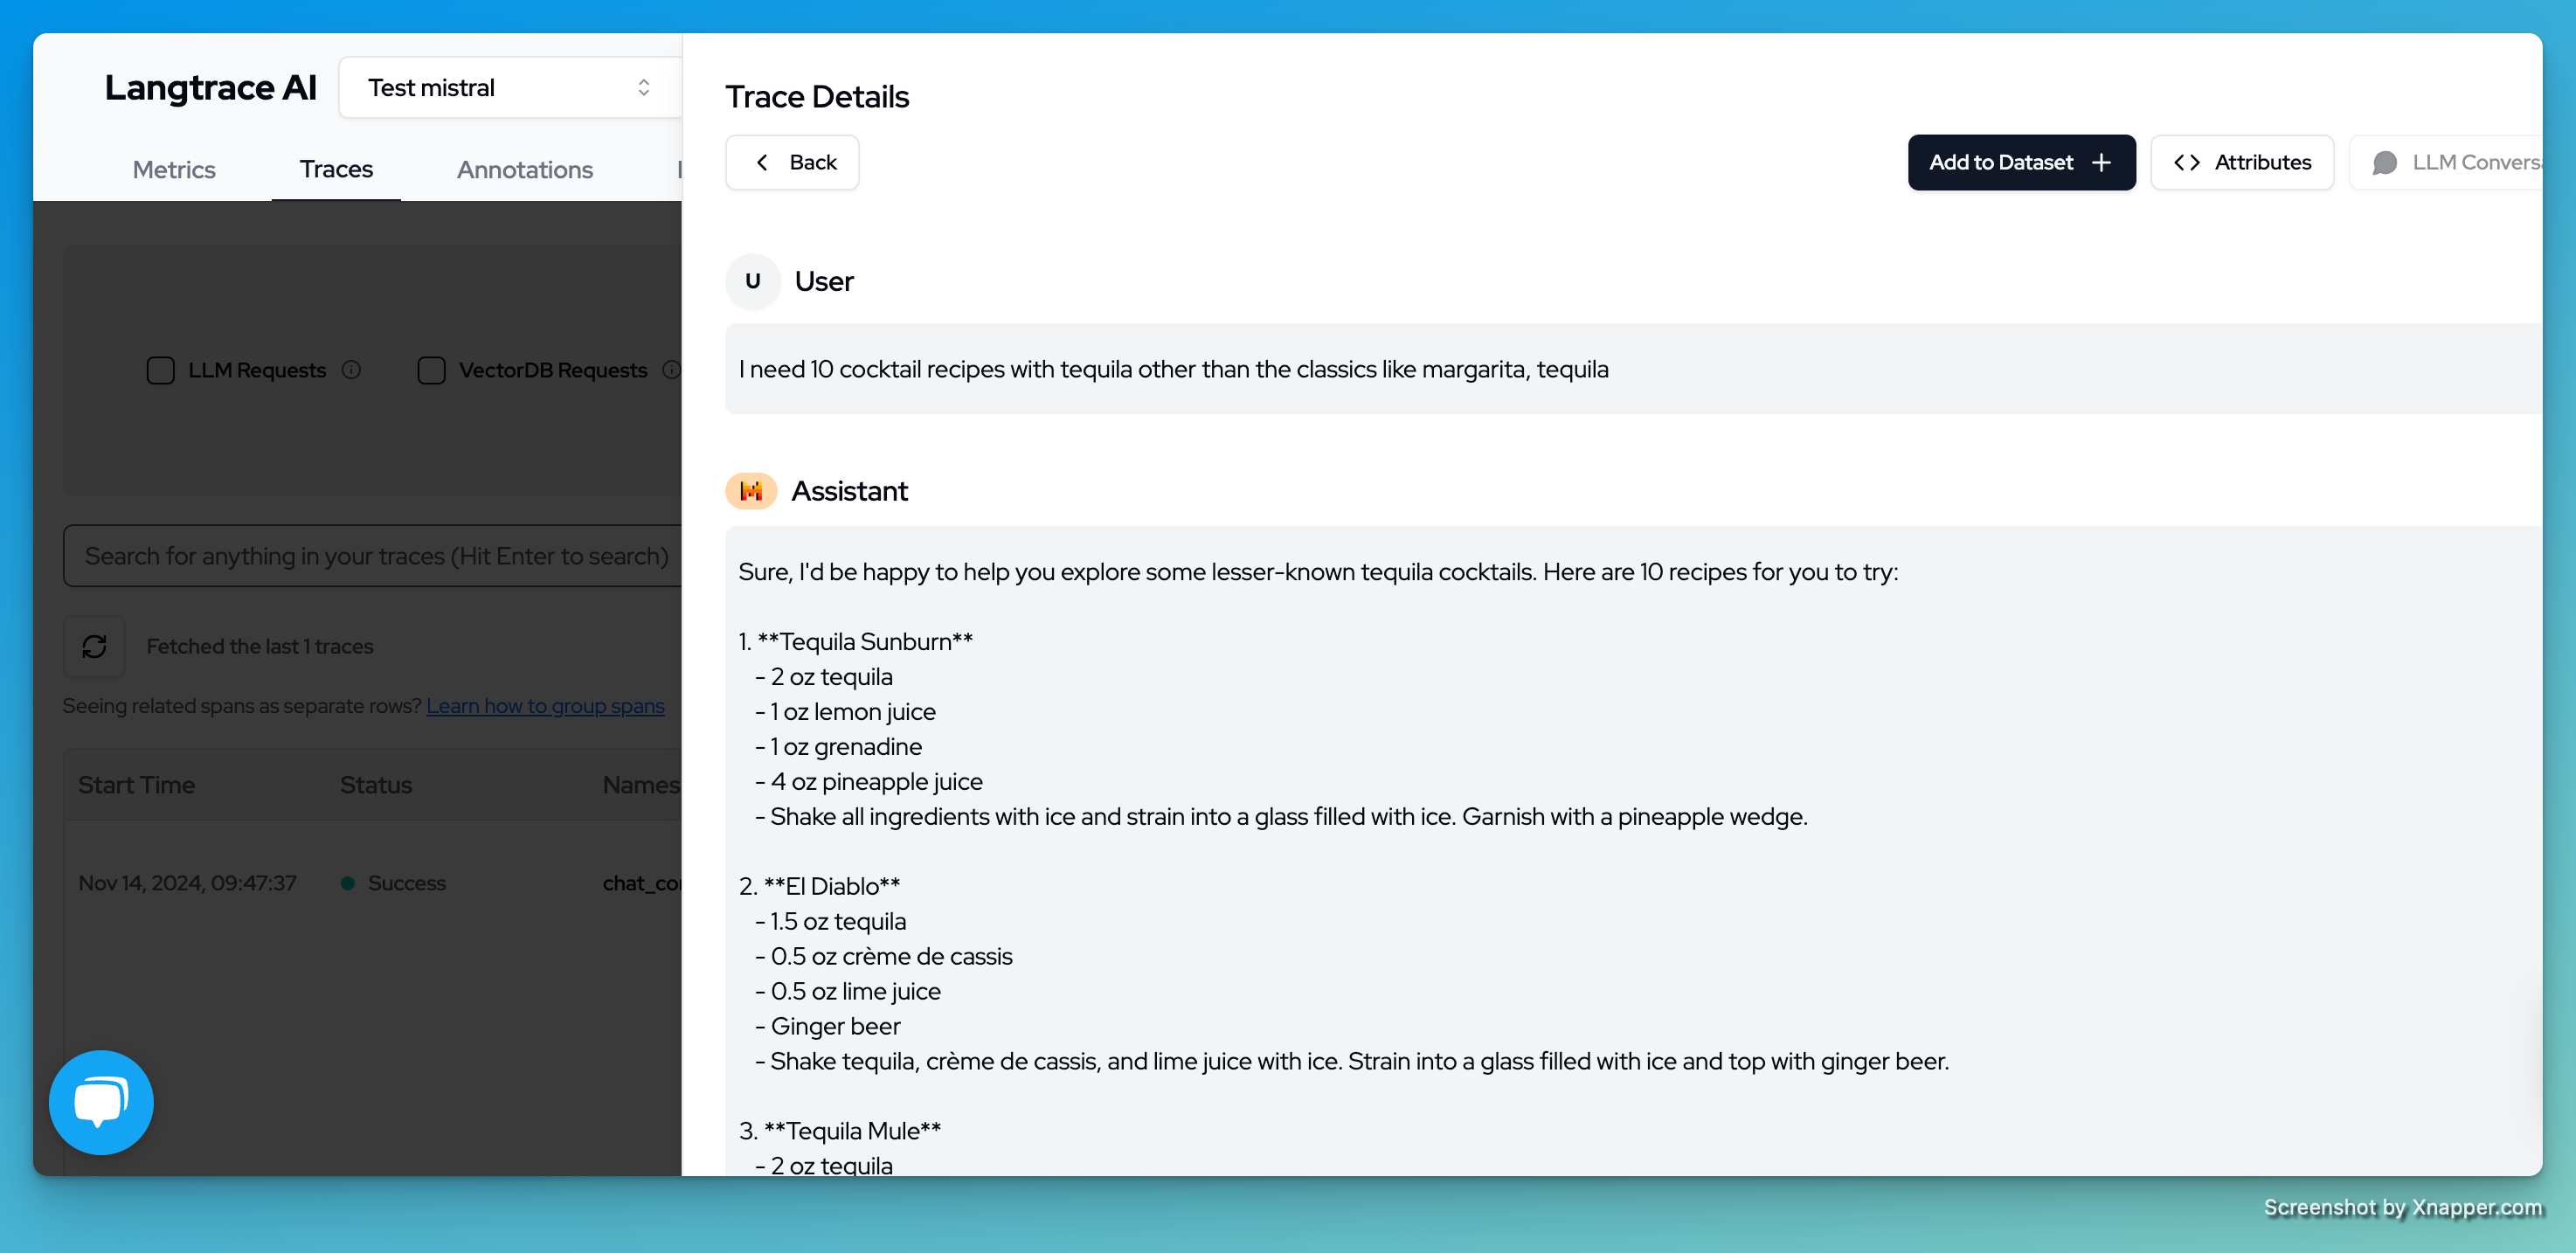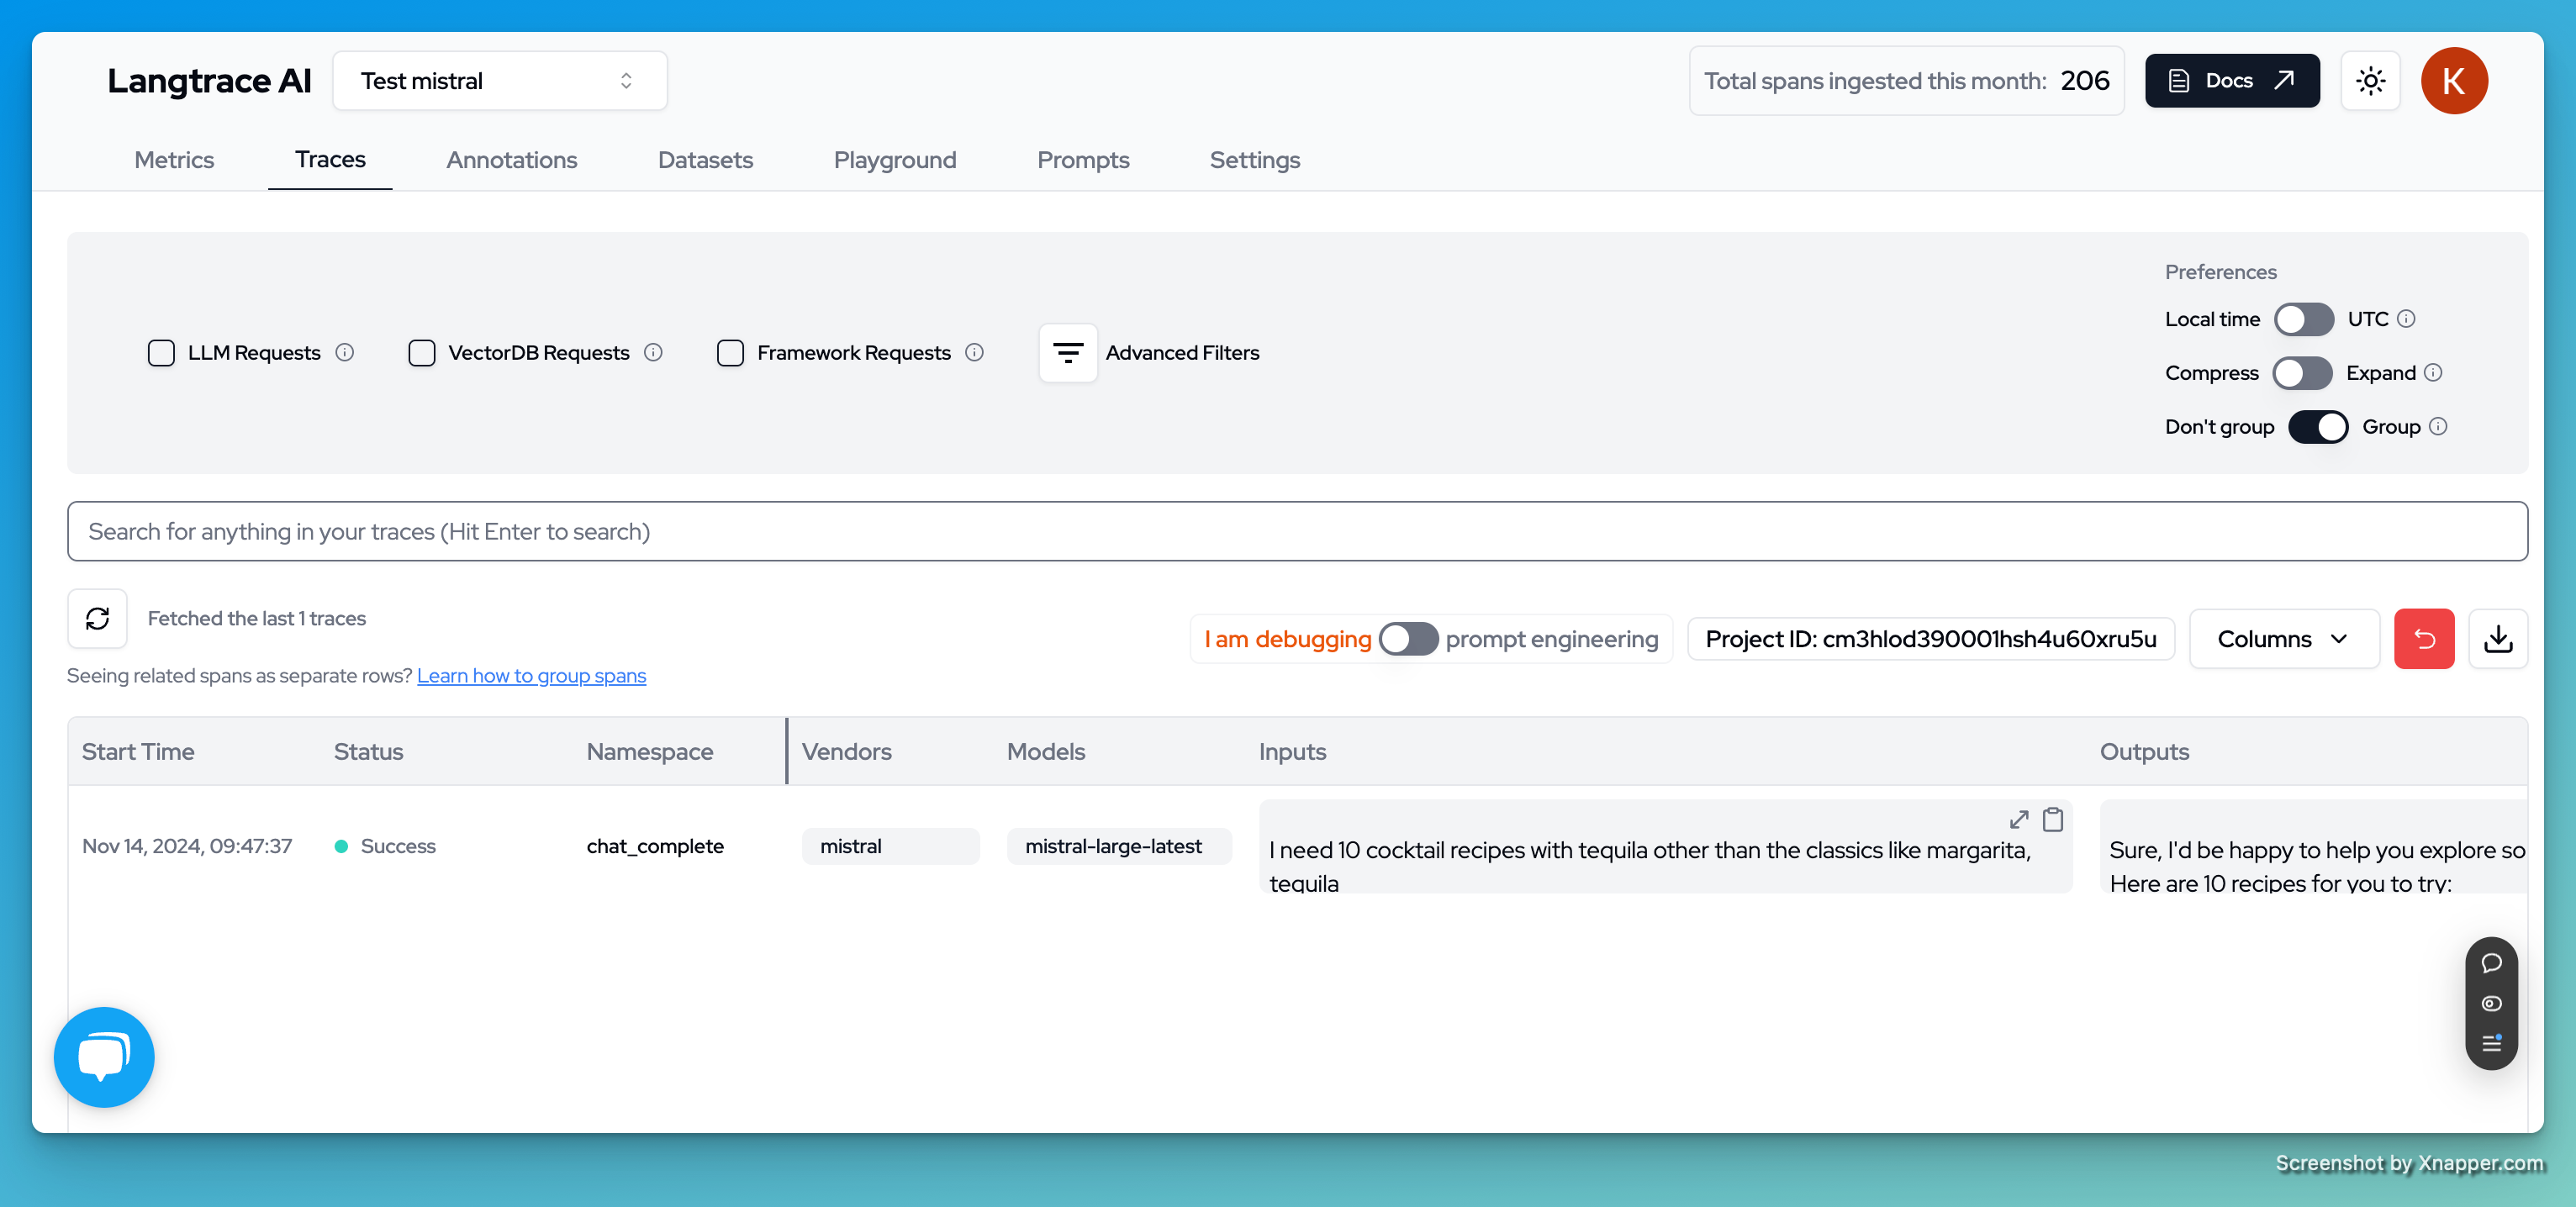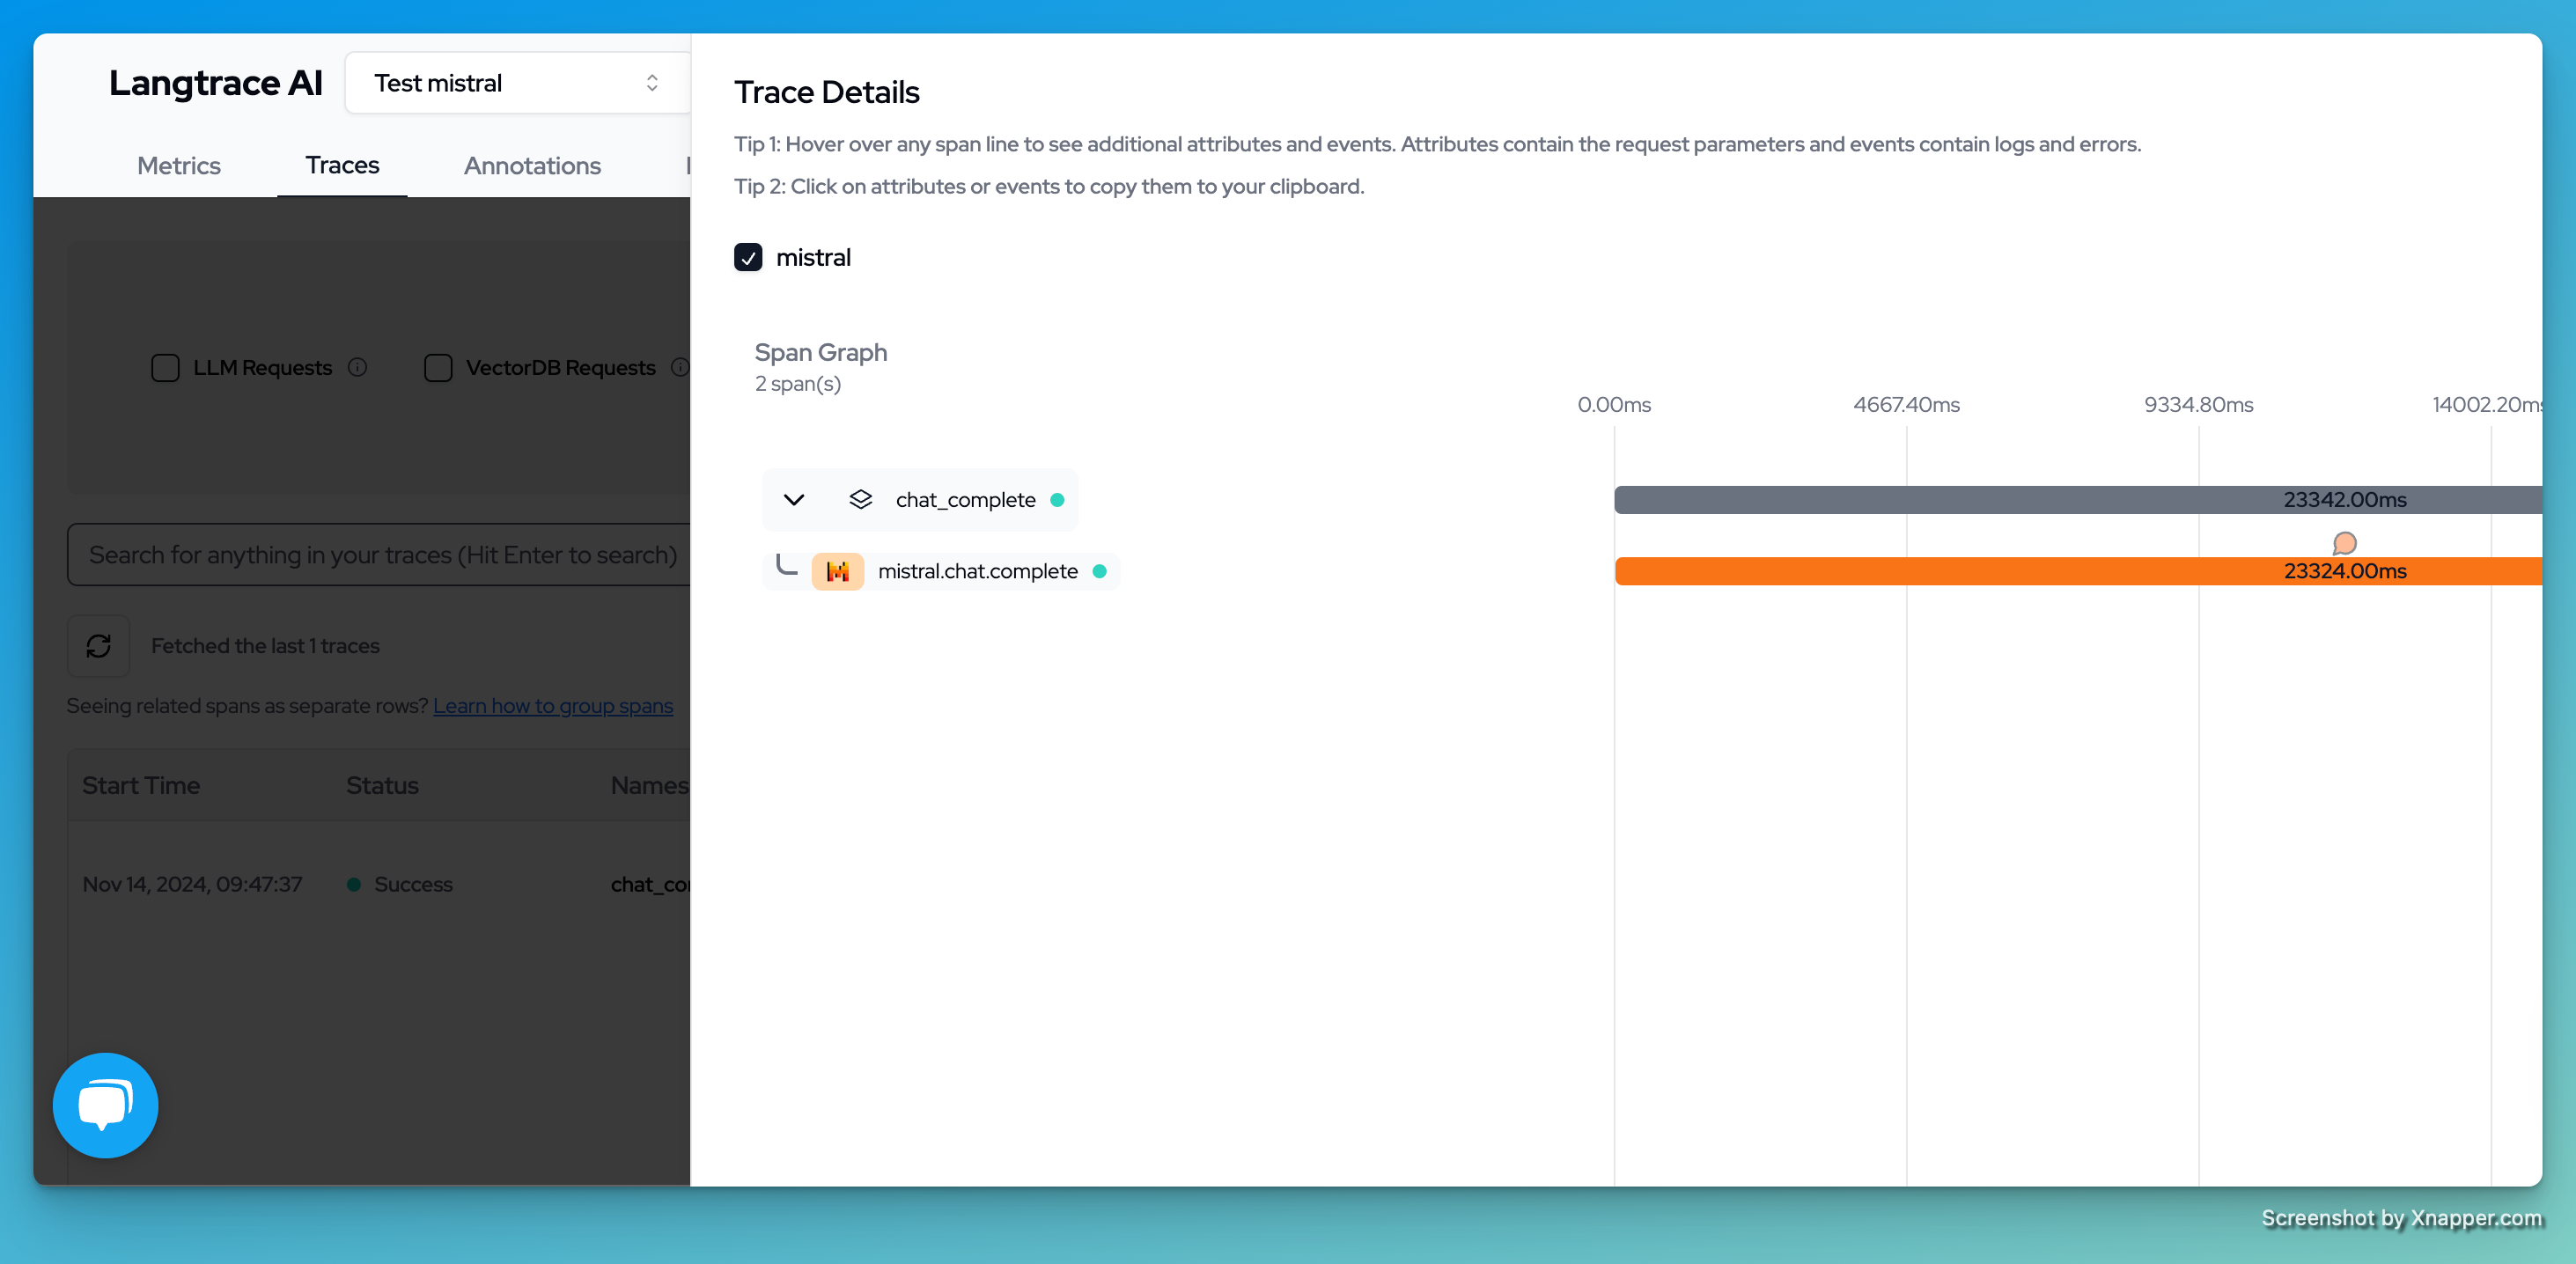